## Pickle ( or csv) and plot

In [1]:
import pandas as pd
macdf = pd.read_csv('../saved_results/csvmaccsv')
macdf


,Neurons,Execution time,Prediction time,By image
0,5,7.45,0.22,0.0000
1,10,8.20,0.23,0.0000
2,50,10.04,0.22,0.0000
3,128,11.75,0.31,0.0000
4,256,15.16,0.31,0.0000
5,512,27.65,0.41,0.0000
6,1024,97.07,0.95,0.0001
7,2048,226.61,4.07,0.0004
8,4096,518.31,3.22,0.0003


In [2]:
times_mac = []
for i in macdf.values.tolist():
    times_mac.append(i[1])
times_mac

[7.45, 8.2, 10.04, 11.75, 15.16, 27.65, 97.07, 226.61, 518.31]

In [3]:
idxlist = macdf.index.tolist()
mac_neurons = []
for i in macdf.values.tolist():
    mac_neurons.append(i[0])
mac_neurons

[5.0, 10.0, 50.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0]

In [4]:
frododf = pd.read_csv('../saved_results/csvfrodocsv')
times_frodo = []
for i in frododf.values.tolist():
    times_frodo.append(i[1])
times_frodo

frodo_neurons = []
for i in frododf.values.tolist():
    frodo_neurons.append(i[0])
frodo_neurons


[5.0, 10.0, 50.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0]

In [5]:
frododf2 = pd.read_csv('../saved_results/frodo2.csv')
times_frodo2 = []
for i in frododf2.values.tolist():
    times_frodo2.append(i[1])
times_frodo2

frodo_neurons2 = []
for i in frododf2.values.tolist():
    frodo_neurons2.append(i[0])
frodo_neurons2

[5.0,
 10.0,
 50.0,
 128.0,
 256.0,
 512.0,
 1024.0,
 1500.0,
 2048.0,
 2500.0,
 3000.0,
 3250.0,
 3500.0,
 3750.0,
 4096.0,
 4500.0]

In [12]:
def pi_df(name):
    pidf = pd.read_csv('../saved_results/' + name)
    neurons = []
    pi_times = []
    for i in pidf.values.tolist():
        neurons.append(i[0])
        pi_times.append(i[1])
    return pi_times, neurons

def mac_df(name):
    macdf = pd.read_csv('../saved_results/' + name)
    mac_times = []
    for i in macdf.values.tolist():
        mac_times.append(i[1])
    return mac_times

def frodo_df(name):
    frododf = pd.read_csv('../saved_results/' + name)
    frodo_times = []
    for i in frododf.values.tolist():
        frodo_times.append(i[1])
    return frodo_times

In [7]:
pidf2 = pd.read_csv('../saved_results/pi2.csv')
times_pi2 = []
for i in pidf2.values.tolist():
    times_pi2.append(i[1])
times_pi2

pi_neurons2 = []
for i in pidf2.values.tolist():
    pi_neurons2.append(i[0])
pi_neurons2

[5.0,
 10.0,
 50.0,
 128.0,
 256.0,
 512.0,
 1024.0,
 1500.0,
 2048.0,
 2500.0,
 3000.0,
 3250.0,
 3500.0,
 3750.0,
 4096.0,
 4500.0]

In [8]:
print(times_frodo2)
len(frodo_neurons2)

[57.92, 57.75, 57.81, 57.47, 57.78, 57.83, 58.26, 58.75, 59.6, 60.91, 61.48, 62.35, 62.61, 63.48, 64.01, 65.39]


16

NameError: name 'pi_neurons' is not defined

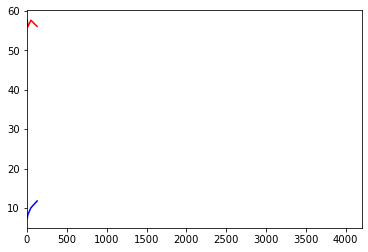

In [9]:
import matplotlib.pyplot as plt 

for i in range(4,10):
    plt.xlim(0,4200)
    plt.plot(mac_neurons[:i],times_mac[:i], 'b')
    plt.plot(frodo_neurons[:i], times_frodo[:i], 'r')
    plt.plot(pi_neurons[:i], times_pi[:i], 'g')
    plt.show()


## Animation

In [25]:
pi_times2, neurons2 = pi_df('pi2.csv')
frodo_times2 = frodo_df('frodo2.csv')

MovieWriter imagemagick unavailable; using Pillow instead.


done


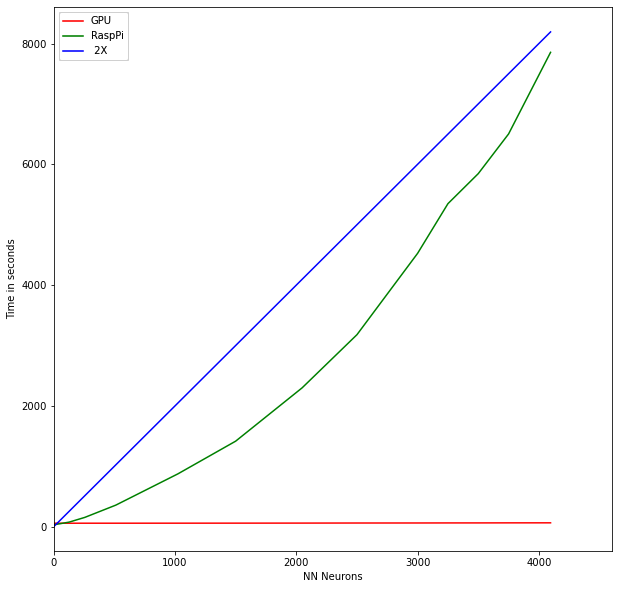

In [26]:
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np

y = [2*x for x in frodo_neurons2]

fig = plt.figure(figsize=(10,10))
camera = Camera(fig)
plt.xlim(0, neurons2[-1] + 100)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.plot(neurons2[3], frodo_times2[3], 'r', label = 'GPU')
plt.plot(neurons2[3], pi_times2[3], 'g', label = 'RaspPi')
plt.plot(neurons2[3], y[3], 'b', label= ' 2X ')
plt.legend()
for i in range(4,len(times_frodo2)):
    plt.plot(neurons2[:i], frodo_times2[:i], 'r')#, label = 'GPU')
    plt.plot(neurons2[:i], pi_times2[:i], 'g')#, label = 'RaspPi')
    plt.plot(neurons2[:i], y[:i], 'b')
    camera.snap()
animation = camera.animate(interval = 500)
print("done")
animation.save('timecomparison.gif', writer = 'imagemagick')

## Old data

In [18]:
pi_times, neurons = pi_df('pi.csv')
mac_times = mac_df('csvmaccsv')
frodo_times = frodo_df('csvfrodocsv')

In [22]:
neurons

[5.0, 10.0, 50.0, 128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0]

MovieWriter imagemagick unavailable; using Pillow instead.


done


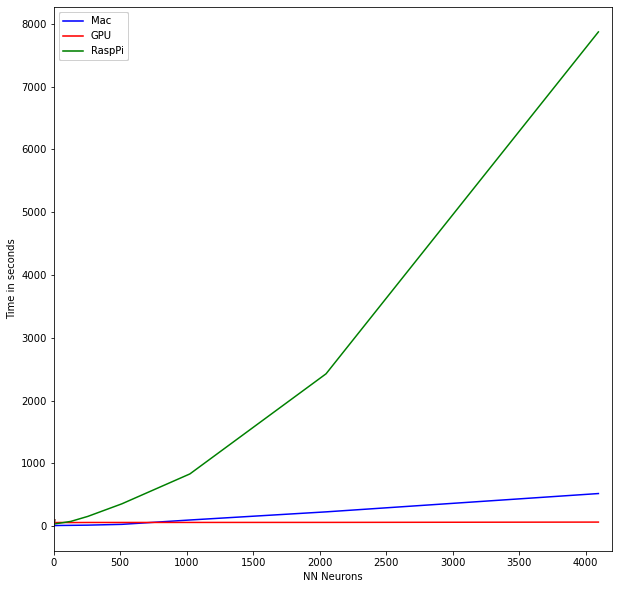

In [24]:
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np

fig = plt.figure(figsize=(10,10))
camera = Camera(fig)

plt.xlim(0,neurons[-1]+100)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.plot(neurons[3], mac_times[3], 'b', label = 'Mac')
plt.plot(neurons[3], frodo_times[3], 'r', label = 'GPU')
plt.plot(neurons[3], pi_times[3], 'g', label = 'RaspPi')
plt.legend()
for i in range(4,len(neurons)+1):
    plt.plot(neurons[:i], mac_times[:i], 'b')#, label = 'Mac')
    plt.plot(neurons[:i], frodo_times[:i], 'r')#, label = 'GPU')
    plt.plot(neurons[:i], pi_times[:i], 'g')#, label = 'RaspPi')
    plt.plot(x, y)
    camera.snap()
animation = camera.animate(interval = 1000)
print("done")
animation.save('../saved_results/timecomparison2.gif', writer = 'imagemagick')